In [10]:
import pandas as pd

arrays = [
    ['USA', 'USA', 'India', 'India'],
    ['NY', 'CA', 'Delhi', 'Mumbai']
]
index = pd.MultiIndex.from_arrays(arrays, names=('Country', 'City'))
df = pd.DataFrame({'Population': [20, 15, 30, 25]}, index=index)

# Access
df.loc['USA']
df.loc[('India', 'Delhi')]


Population    30
Name: (India, Delhi), dtype: int64

In [12]:
import pandas as pd
import seaborn as sns

# Load iris dataset
iris = sns.load_dataset("iris")
print(iris.head())


Matplotlib is building the font cache; this may take a moment.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [13]:
pivot = pd.pivot_table(
    iris,
    values=['petal_length', 'petal_width'],  # values to aggregate
    index='species',                         # rows
    aggfunc='mean'                           # aggregation function
)

print(pivot)

            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


In [15]:
print(iris.dtypes)


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [16]:
print(iris.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [17]:
duplicates = iris.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Duplicate rows: 1


In [18]:
# Display the duplicate rows
duplicate_rows = iris[iris.duplicated(keep=False)]  # keep=False to mark all duplicates
print(duplicate_rows)

     sepal_length  sepal_width  petal_length  petal_width    species
101           5.8          2.7           5.1          1.9  virginica
142           5.8          2.7           5.1          1.9  virginica


In [19]:
print(iris.describe())

# Example: Filter potential outliers in sepal_length
q1 = iris['sepal_length'].quantile(0.25)
q3 = iris['sepal_length'].quantile(0.75)
iqr = q3 - q1
outliers = iris[(iris['sepal_length'] < (q1 - 1.5 * iqr)) |
                (iris['sepal_length'] > (q3 + 1.5 * iqr))]
print(outliers)


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


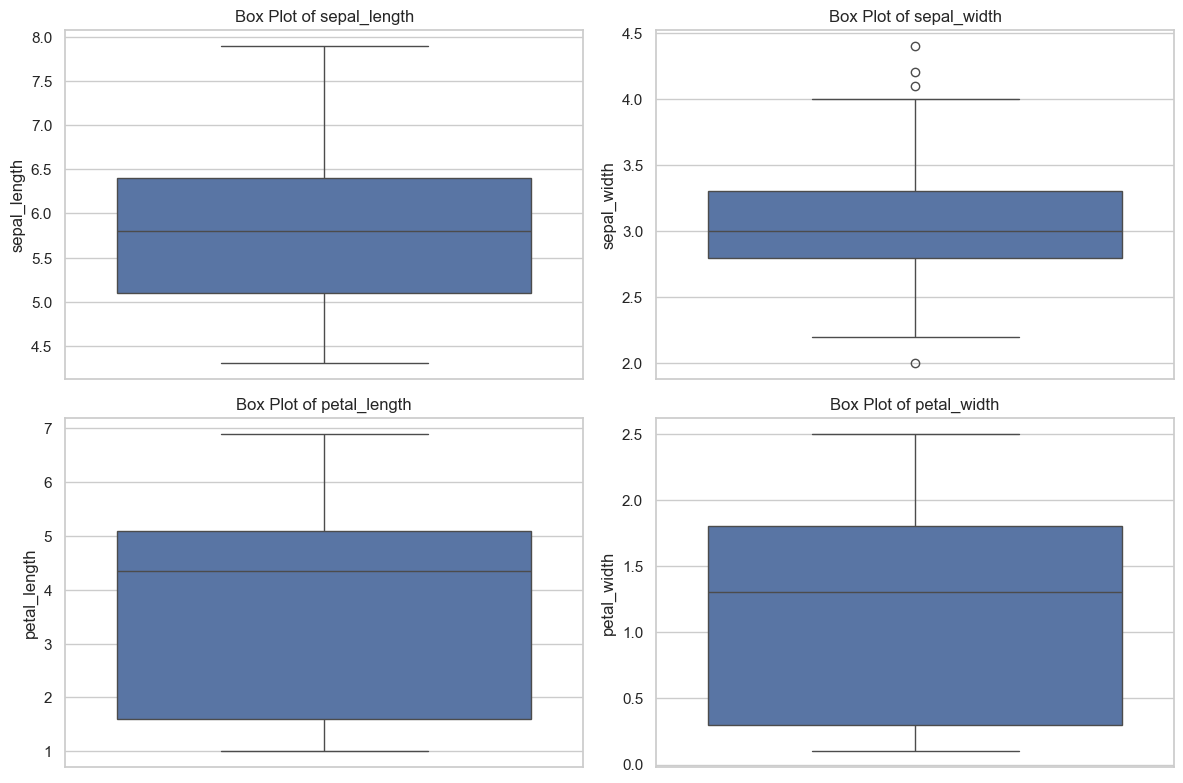

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=iris[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

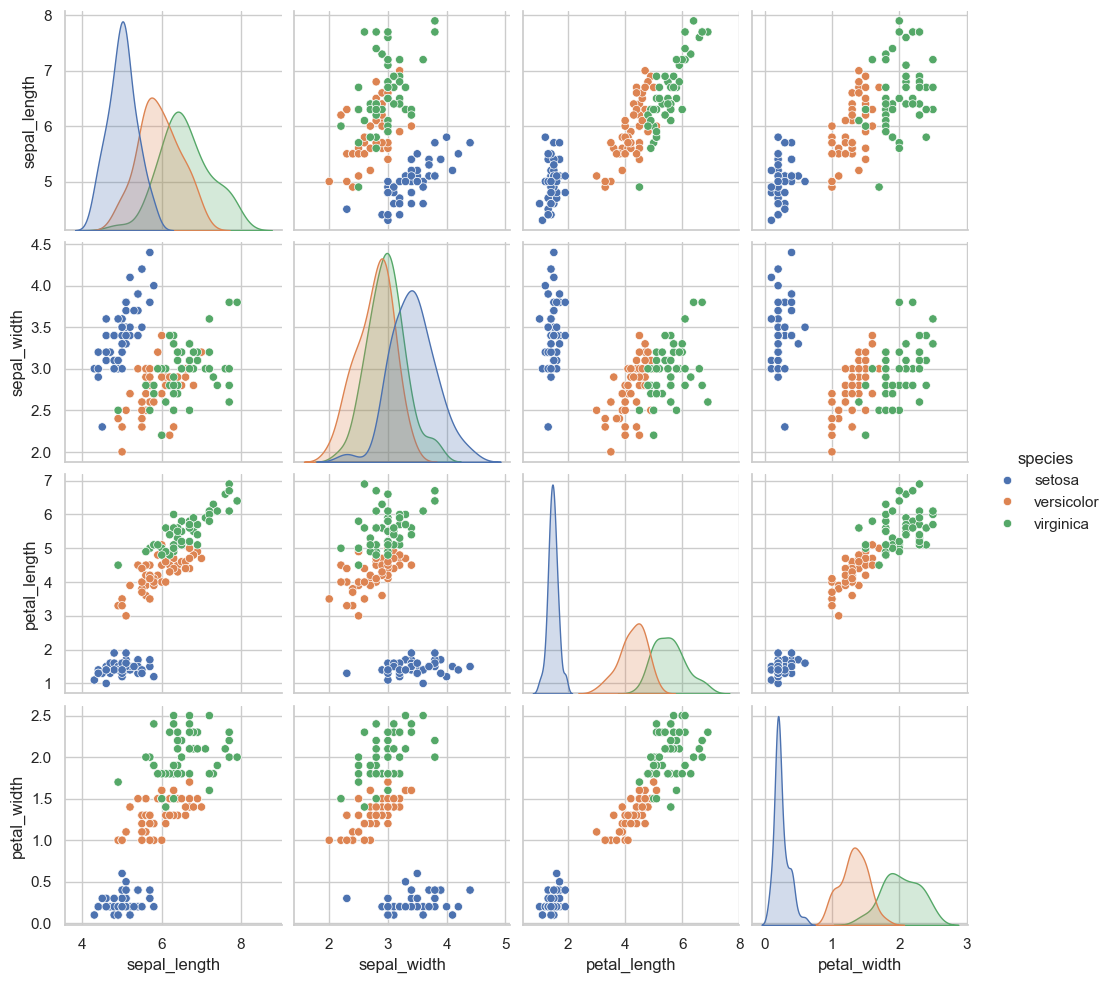

In [22]:
# Create scatter plots for pairs of features
plt.figure(figsize=(12, 8))
sns.pairplot(iris, hue='species')
plt.show()



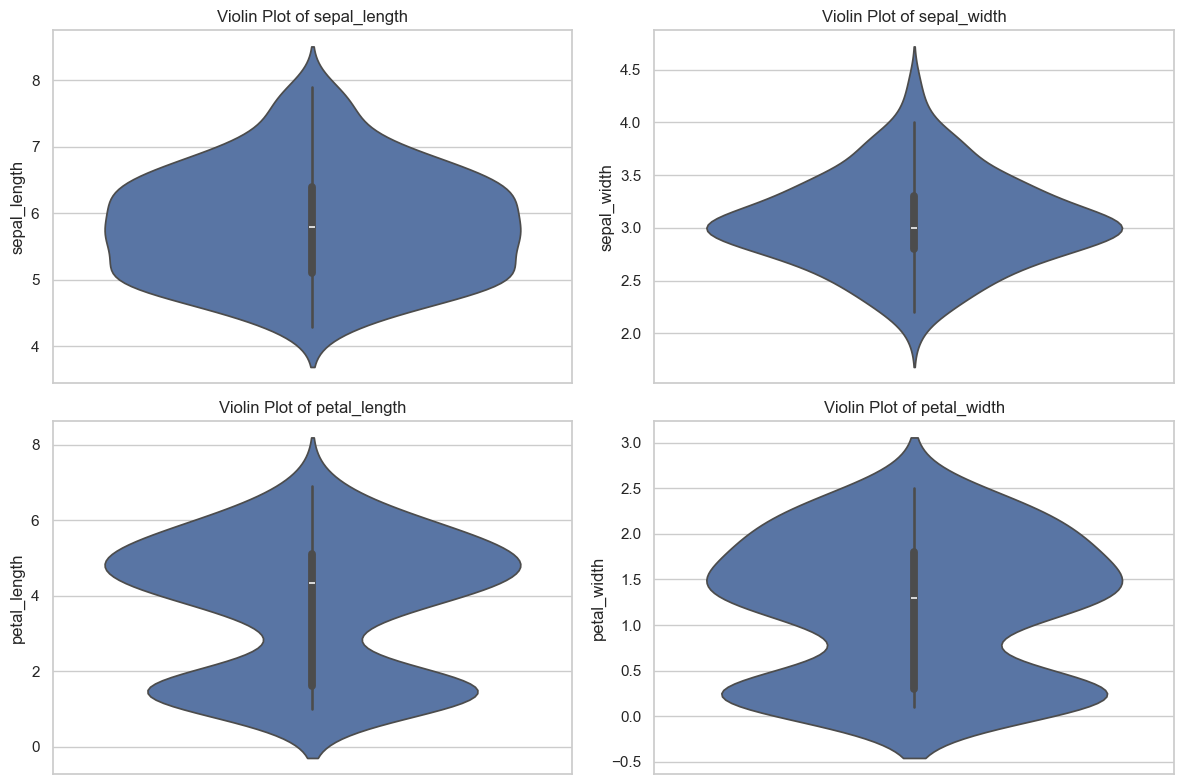

In [23]:
# Create violin plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(y=iris[column])
    plt.title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()


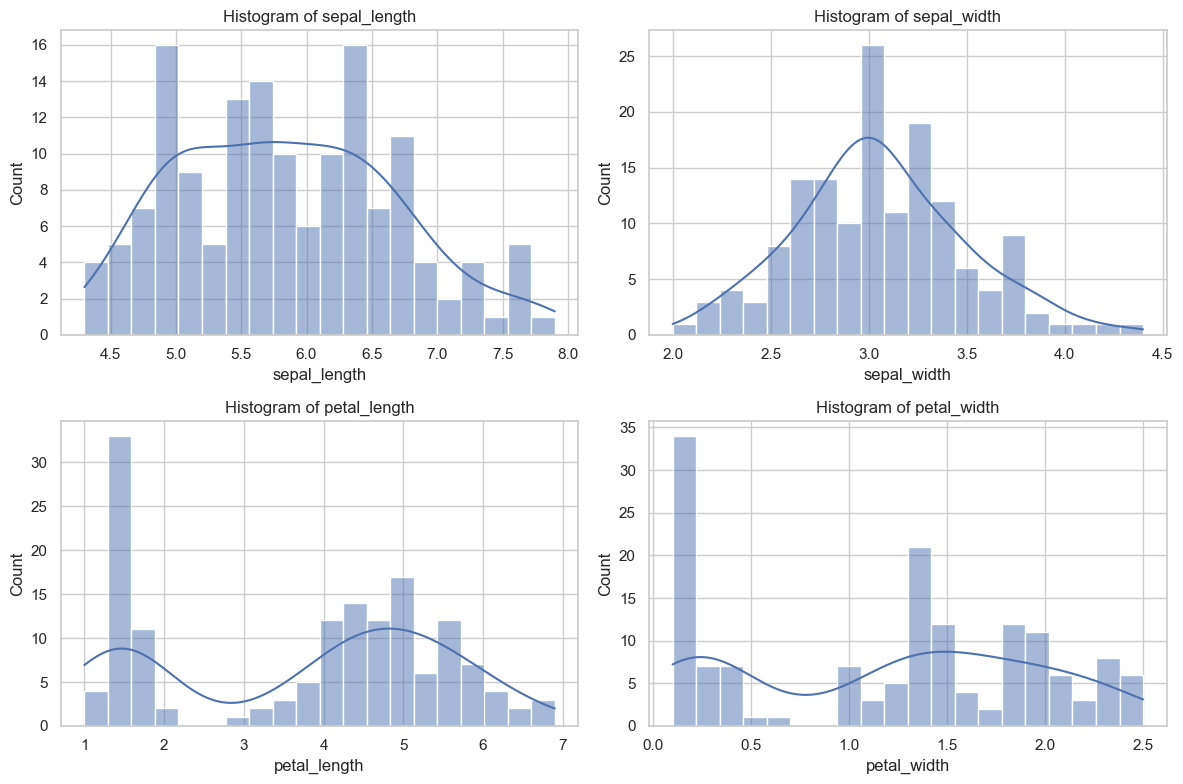

In [24]:
# Create histograms for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


In [25]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


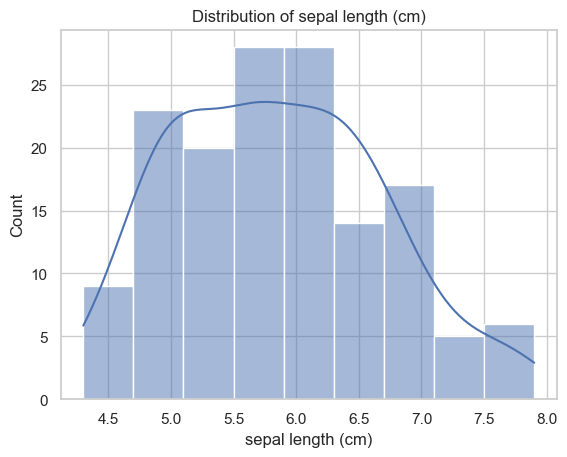

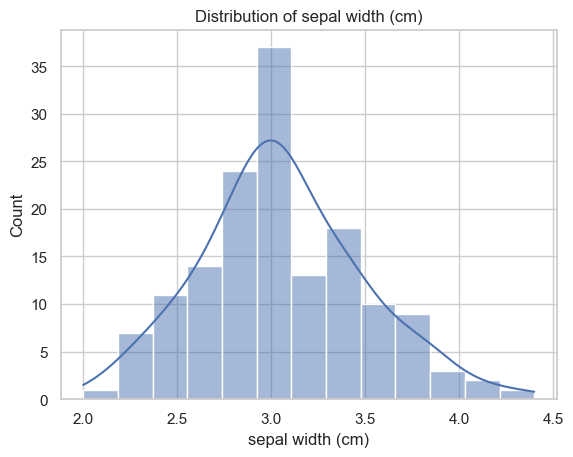

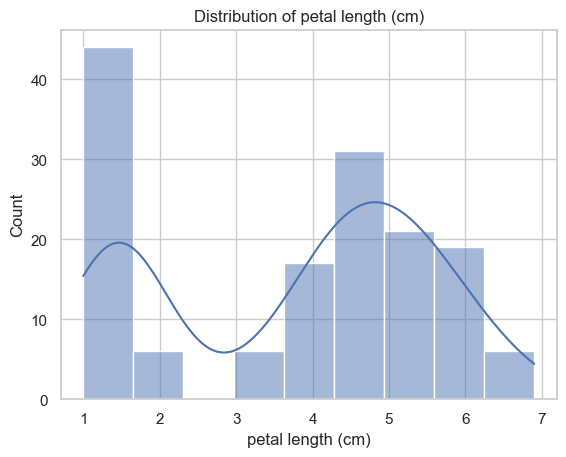

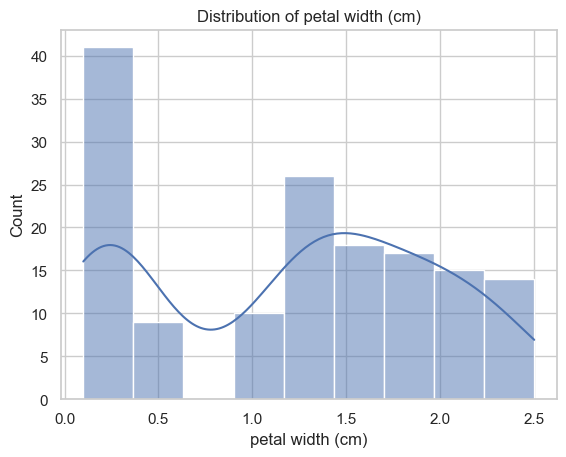

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns[:-1]:  # exclude 'species'
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [27]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


sepal length (cm): p-value = 0.010181161454691156


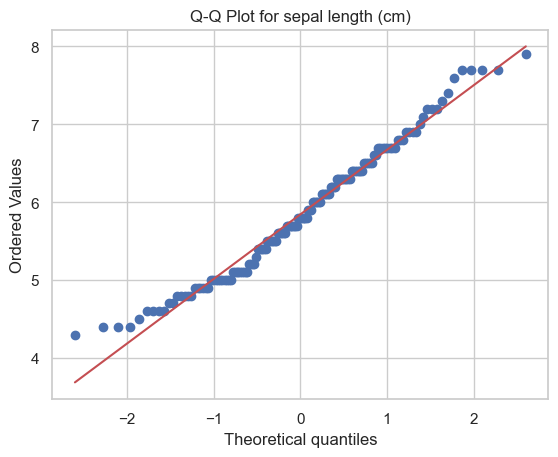

sepal width (cm): p-value = 0.10115426916130282


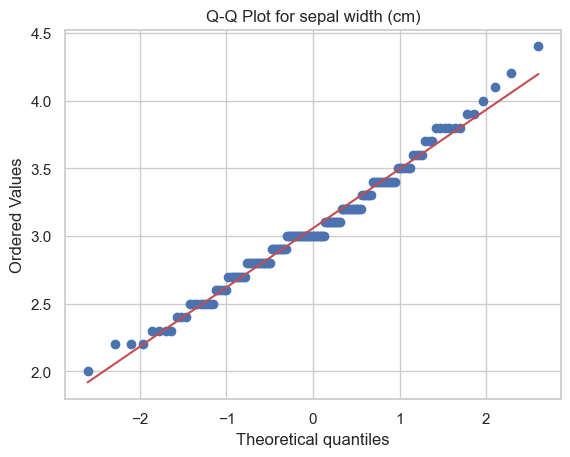

petal length (cm): p-value = 7.412263135173186e-10


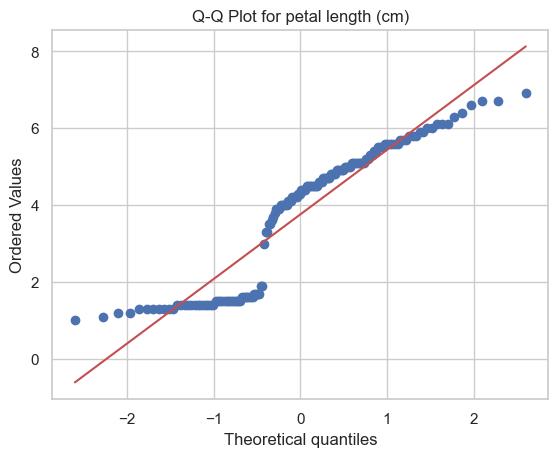

petal width (cm): p-value = 1.680465210314913e-08


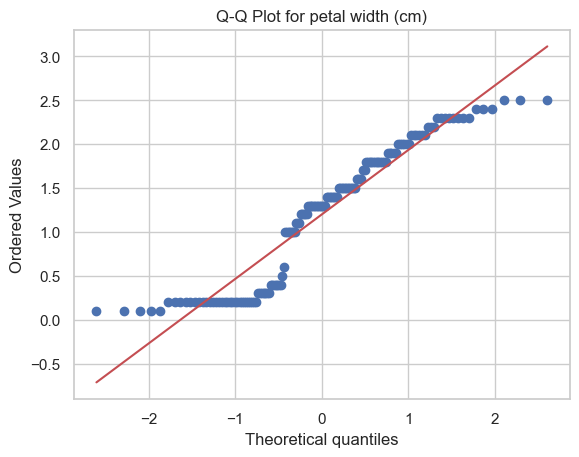

In [32]:
from scipy.stats import shapiro, probplot

for column in df.columns[:-1]:
    stat, p = shapiro(df[column])
    print(f'{column}: p-value = {p}')
    probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()
